In [2]:
# import necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sb
from sklearn import preprocessing
%matplotlib inline

In [3]:
# import types and pandas libraries

import types
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# describe the statistical data for each column of the dataframe

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# displays the data types of each column in the dataframe

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
'''
Through the summary table and the data types function above, it seems that all fields are already in 
numerical form. Therefore, there should not be any needed one-hot encoding
or label encoding done on this dataset. 
'''

'\nThrough the summary table and the data types function above, it seems that all fields are already in \nnumerical form. Therefore, there should not be any needed one-hot encoding\nor label encoding done on this dataset. However, upsampling to help \neven out the "Class" field is likely necessary. We will double check this\nassumption below\n'

In [7]:
# import counter from collections, set var a to a series of the Class column in order to display the number of fraudulent cases in our dataframe

from collections import Counter
a=df['Class']
x=1
d = Counter(a) 
print('{} has occurred {} times'.format(x, d[x])) 

1 has occurred 492 times


In [8]:
# display the count of instances in our dataframe

df['Class'].count()

284807

Text(0.5, 1.0, 'Box Plot of V17 and Class')

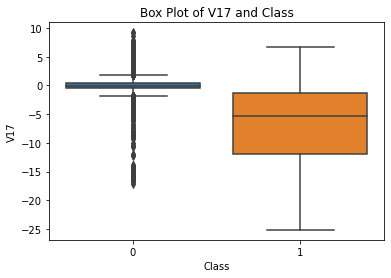

In [9]:
sb.boxplot(x="Class",y="V17",data=df).set_title('Box Plot of V17 and Class')

In [10]:
'''
Through the code above, fraud only occurs 492 times, with the field
having a total of 284,807 rows of data. We can see through the box plot that
the non-fraudulent transactions box is much more condensed since it has many more observations.
Whereas, the fraudulent box and interquartile ranges are much larger since there are not as many
observations.
'''

'\nThrough the code above, fraud only occurs 492 times, with the field\nhaving a total of 284,807 rows of data. As expressed above, upsampling \nwill need to occur within the sampling to effectively classify these \nsamples as fraud or not.\n'

In [11]:
# Store all but last field as x-variables

x = df.iloc[:, :-1].values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [12]:
# Store last field as y-variable

y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# import train_test_split module and create train and test sets (80% train, 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (227845, 30) (227845,)
Test set: (56962, 30) (56962,)


In [14]:
# import tree module and run Decision Tree Classifier on our train set

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
# Predict classifiers using predictors

y_predict=clf.predict(X_test)

In [16]:
# Provide evaluation using Accuracy

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.9988764439450862


In [18]:
# import confusion matrix module to provide evaluation using confusion matrix

from sklearn.metrics import confusion_matrix
labels=[0,1]
cm=confusion_matrix(y_test,y_predict,labels)
print(cm)

[[56816    45]
 [   19    82]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [19]:
# set Up KNN Classifier on Traning dataset 

from sklearn.neighbors import KNeighborsClassifier
k = 4

#Train Model and Predict

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [20]:
# predict the classifiers through Trained model using Test dataset

yhat = neigh.predict(X_test)

In [21]:
# evaluation metrices of KNN Classifier

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9984507011345433
Test set Accuracy:  0.9983322214809873


In [22]:
# provide evaluation using confusion matrix

from sklearn.metrics import confusion_matrix
labels=[0,1]
cm_knn=confusion_matrix(y_test,yhat,labels)
print(cm_knn)

[[56861     0]
 [   95     6]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [23]:
# trying a 60/40 test-training set with tree clasifier (60% train, 40% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (170884, 30) (170884,)
Test set: (113923, 30) (113923,)


In [24]:
# run Decision Tree Classifier on our new train set

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [25]:
# predict classifiers using predictors

y_predict=clf.predict(X_test)

In [26]:
# provide evaluation using Accuracy

print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.9992012148556482


In [27]:
# provide evaluation using confusion matrix

labels=[0,1]
cm=confusion_matrix(y_test,y_predict,labels)
print(cm)

[[113681     56]
 [    35    151]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 1.0, '60/40 Decision Tree Classifier Confusion Matrix')

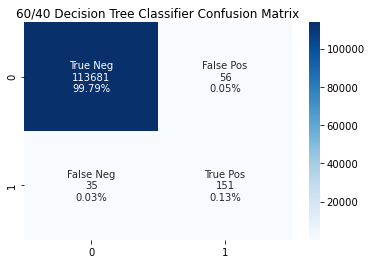

In [28]:
# import seaborn
# create heatmap visualization with percentage values by confusion matrix output
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
                     
                    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues').set_title('60/40 Decision Tree Classifier Confusion Matrix')


In [29]:
#look for correlation between carriables and 
print(df.corr())

'''
V17 has highest correlation with class. It has negative correlation of -0.326481, will examine in scatterplot
'''

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.12

'\nV17 has highest correlation with class. It has negative correlation of -0.326481, will examine in scatterplot\n'

Text(0.5, 1.0, 'Linear Regression between V17 and Fraud')

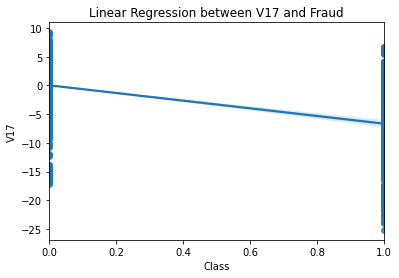

In [30]:
#scatterplot
sns.regplot(x="Class", y="V17", data=df).set_title('Linear Regression between V17 and Fraud')

In [31]:
#Calculate Pearson Cofficent for relationship between class and V17
import scipy.stats as stat

pearson_coef, p_value = stat.pearsonr(df['V17'], df['Class'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 




The Pearson Correlation Coefficient is -0.3264810672437175  with a P-value of P = 0.0


In [32]:
#import necessary libraries for anova tables
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [33]:
lm = ols('Class ~ V17', data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                df      sum_sq    mean_sq             F  PR(>F)
V17            1.0   52.351631  52.351631  33979.168593     0.0
Residual  284805.0  438.798446   0.001541           NaN     NaN
